# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_data=[]
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
        date=(response["dt"])
        country=(response["sys"]["country"])
        lat=(response["coord"]["lat"])
        lng=(response["coord"]["lon"])
        max_temp=(response["main"]["temp_max"])
        humidity=(response["main"]["humidity"])
        clouds=(response["clouds"]["all"])
        wind=(response["wind"]["speed"])
        city_data.append({"City":city,"Date":date,"Country":country,"Latitude":lat,"Longitude":lng,"Max Temperature":max_temp,"Humidity":humidity,"Clouds":clouds,"Wind":wind})
    except(KeyError,IndexError):
        print("City not found. Skipping...")
        pass
        


    
    
     
        
    

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(f" Data Retrieved for {cities}")

 Data Retrieved for ['cape town', 'yilan', 'macusani', 'malwan', 'mahebourg', 'puerto ayora', 'guerrero negro', 'lebu', 'lemesos', 'punta arenas', 'kruisfontein', 'buala', 'ribeira grande', 'airai', 'aripuana', 'illoqqortoormiut', 'saskylakh', 'avarua', 'walvis bay', 'rikitea', 'albany', 'hami', 'hilo', 'yellowknife', 'axim', 'vaini', 'kaitangata', 'sorada', 'tarudant', 'pinotepa nacional', 'keti bandar', 'fort nelson', 'hovd', 'jamestown', 'ponta do sol', 'chuy', 'ushuaia', 'kavaratti', 'college', 'nanortalik', 'cap malheureux', 'mae sai', 'busselton', 'tiksi', 'sergeyevka', 'torbay', 'colborne', 'samusu', 'asau', 'oktyabrskoye', 'mount gambier', 'cabo san lucas', 'bluff', 'bauchi', 'nikolskoye', 'mabaruma', 'tiznit', 'tuktoyaktuk', 'arrifes', 'havoysund', 'barrow', 'ulladulla', 'bredasdorp', 'attawapiskat', 'roald', 'souillac', 'provideniya', 'vila franca do campo', 'nelidovo', 'jasper', 'cherskiy', 'qaanaaq', 'ilulissat', 'saint-philippe', 'naze', 'lompoc', 'castro', 'banda aceh', '

In [6]:
cities_df=pd.DataFrame(city_data)
cities_df.head()

,City,Date,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind
0,cape town,1626878564,ZA,-33.9258,18.4232,54.10,74,75,1.99
1,yilan,1626878745,TW,24.7570,121.7530,80.46,83,100,6.62
2,macusani,1626878745,PE,-14.0833,-70.4333,44.51,41,4,3.65
3,mahebourg,1626878746,MU,-20.4081,57.7000,68.29,88,75,13.80
4,puerto ayora,1626878746,EC,-0.7393,-90.3518,76.96,91,100,8.99


In [7]:
# Saving the output to csv
cities_df.to_csv = output_data_file

In [8]:
# Based on this empty return, there are no cities with a humidity level above 100%
humid_df=cities_df.loc[cities_df["Humidity"] > 100]
humid_df

,City,Date,Country,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
# Skipping this step because we have no cities with humidity over 100%

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipping this step because we have no humidity outliers

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

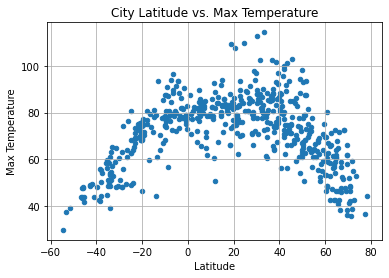

In [11]:
cities_df.plot(x="Latitude",y="Max Temperature",kind="scatter",title="City Latitude vs. Max Temperature",grid=True)
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

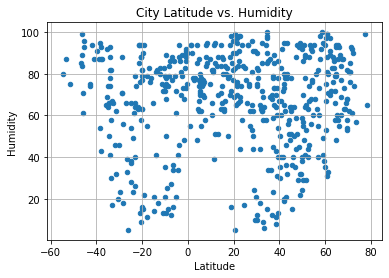

In [12]:
cities_df.plot(x="Latitude",y="Humidity",kind="scatter",title="City Latitude vs. Humidity",grid=True)
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

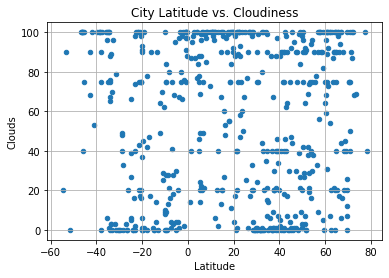

In [13]:
cities_df.plot(x="Latitude",y="Clouds",kind="scatter",title="City Latitude vs. Cloudiness",grid=True)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
cities_df.plot(x="Latitude",y="Wind",kind="scatter",title="City Latitude vs. Wind Speed",grid=True)
plt.savefig("../output_data/Fig4.png")
plt.show()

In [17]:
# Defining what part of the hemisphere all the cities are located in based on their latitude
Southern_df = cities_df.loc[pd.to_numeric(cities_df["Latitude"]).astype(float) < 0, :]
Northern_df = cities_df.loc[pd.to_numeric(cities_df["Latitude"]).astype(float) > 0, :]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6030724788287267
The r-value suggests a negative correlation
In the northern hemisphere,data suggests that temperature seems to be lower as you move away from the equator


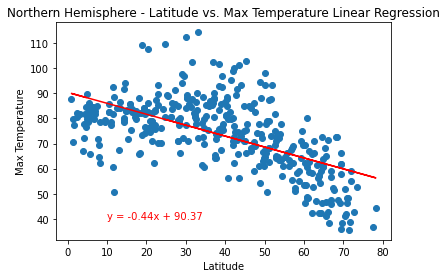

In [48]:
# Defining x and y values
x= pd.to_numeric(Northern_df['Latitude']).astype(float)
y= pd.to_numeric(Northern_df['Max Temperature']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(10,40),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Latitude vs. Max Temperature Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a negative correlation")
print("In the northern hemisphere,data suggests that temperature seems to be lower as you move away from the equator")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8511877198353613
The r-value suggests a positive correlation
In the southern hemisphere,data suggests that temperature seems to be higher as you move towards the equator


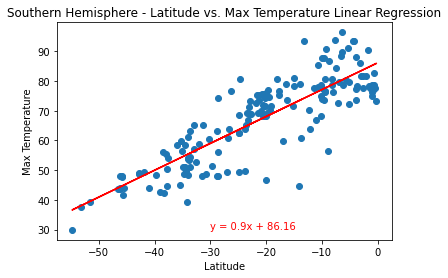

In [49]:
# Defining x and y values
x= pd.to_numeric(Southern_df['Latitude']).astype(float)
y= pd.to_numeric(Southern_df['Max Temperature']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(-30,30),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Latitude vs. Max Temperature Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a positive correlation")
print("In the southern hemisphere,data suggests that temperature seems to be higher as you move towards the equator")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.05811101107266921
The r-value suggests a no correlation
In the northern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator


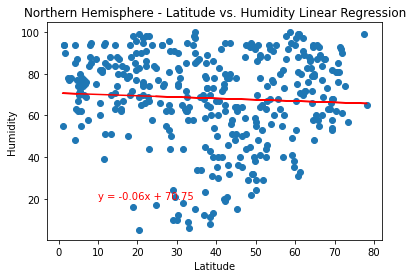

In [50]:
# Defining x and y values
x= pd.to_numeric(Northern_df['Latitude']).astype(float)
y= pd.to_numeric(Northern_df['Humidity']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(10,20),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Latitude vs. Humidity Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a no correlation")
print("In the northern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.09116877837005302
The r-value suggests a no correlation
In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator


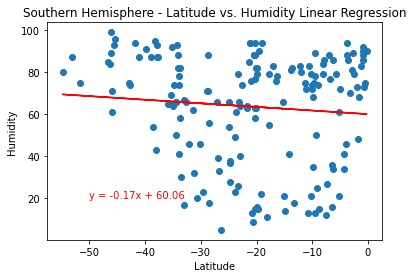

In [51]:
# Defining x and y values
x= pd.to_numeric(Southern_df['Latitude']).astype(float)
y= pd.to_numeric(Southern_df['Humidity']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(-50,20),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a no correlation")
print("In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.07633192111790883
The r-value suggests a no correlation
In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator


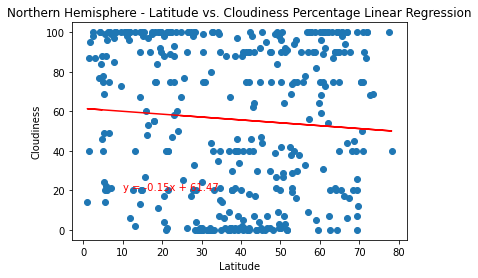

In [52]:
# Defining x and y values
x= pd.to_numeric(Northern_df['Latitude']).astype(float)
y= pd.to_numeric(Northern_df['Clouds']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(10,20),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Percentage Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a no correlation")
print("In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.10706467405561317
The r-value suggests a no correlation
In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator


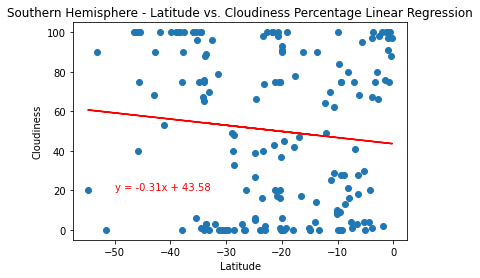

In [53]:
# Defining x and y values
x= pd.to_numeric(Southern_df['Latitude']).astype(float)
y= pd.to_numeric(Southern_df['Clouds']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(-50,20),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Percentage Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a no correlation")
print("In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.13676188680382134
The r-value suggests a no correlation
In the Northern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator


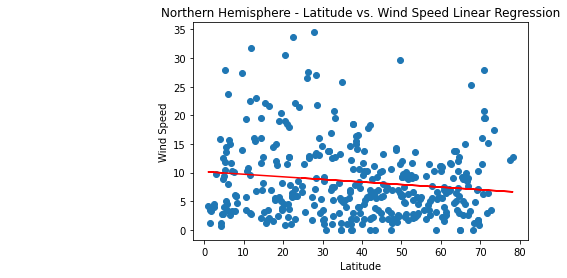

In [54]:
# Defining x and y values
x= pd.to_numeric(Northern_df['Latitude']).astype(float)
y= pd.to_numeric(Northern_df['Wind']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(-50,20),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a no correlation")
print("In the Northern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.08696012953828035
The r-value suggests a no correlation
In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator


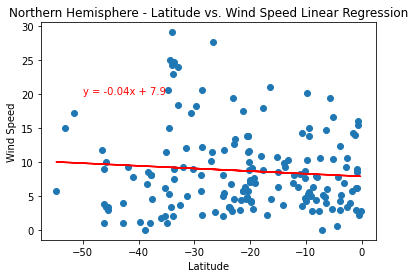

In [55]:
# Defining x and y values
x= pd.to_numeric(Southern_df['Latitude']).astype(float)
y= pd.to_numeric(Southern_df['Wind']).astype(float)
# Defining linregress formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
# Defining y=mx + b formula
slope_intercept = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plotting 
plt.scatter(x,y)
# Plotting regression
plt.plot(x,regress_values,"r-")
# Placing the line equation
plt.annotate(slope_intercept,(-50,20),fontsize=10,color="red")
# Labeling and formatting
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')
print(f"The r value is: {rvalue}")
print("The r-value suggests a no correlation")
print("In the Southern hemisphere,data suggests that there is no relationship between humidity and a country's positioning with the equator")
plt.show()